<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Import-Libray" data-toc-modified-id="Import-Libray-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libray</a></span></li><li><span><a href="#Question" data-toc-modified-id="Question-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question</a></span></li><li><span><a href="#Answer" data-toc-modified-id="Answer-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Answer</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Dataset-Exploration" data-toc-modified-id="Dataset-Exploration-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Dataset Exploration</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Hypotesis-Testing" data-toc-modified-id="Hypotesis-Testing-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Hypotesis Testing</a></span><ul class="toc-item"><li><span><a href="#Paired-Tests---One-tailed" data-toc-modified-id="Paired-Tests---One-tailed-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Paired Tests - One tailed</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#The-Trend" data-toc-modified-id="The-Trend-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>The Trend</a></span></li></ul></li></ul></li></ul></div>

# Introduction

**Name:** Fadilah Nur Imani
<br>
**Class/Batch:** FTDS/001
<br>
**Nongraded Challenge:** 12

# Import Libray

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)

# Question

Using data from this <a href="https://www.kaggle.com/hendratno/covid19-indonesia"> Covid19 ID - Kaggle</a>:
- Perform hypothesis test on the dataset above.
- Write the conclusion from the analysis result.

# Answer

## Load Data

In [3]:
data = pd.read_csv("data/covid_19_indonesia_time_series_all.csv")

## Dataset Exploration

In [4]:
print(data.shape)
data.head()

(16283, 41)


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.0,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.0,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.0,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         16283 non-null  object 
 1   Location ISO Code            16283 non-null  object 
 2   Location                     16283 non-null  object 
 3   New Cases                    16283 non-null  int64  
 4   New Deaths                   16283 non-null  int64  
 5   New Recovered                16283 non-null  int64  
 6   New Active Cases             16283 non-null  int64  
 7   Total Cases                  16283 non-null  int64  
 8   Total Deaths                 16283 non-null  int64  
 9   Total Recovered              16283 non-null  int64  
 10  Total Active Cases           16283 non-null  int64  
 11  Location Level               16283 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [6]:
data.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
New Cases,16283.0,3.012719e+02,1.330028e+03,0.000000,6.000000e+00,3.900000e+01,1.270000e+02,3.839100e+04
New Deaths,16283.0,7.919364e+00,3.217143e+01,0.000000,0.000000e+00,1.000000e+00,4.000000e+00,1.040000e+03
New Recovered,16283.0,2.480158e+02,9.977849e+02,0.000000,2.000000e+00,2.400000e+01,1.060000e+02,2.897500e+04
New Active Cases,16283.0,4.533673e+01,5.502037e+02,-8381.000000,-7.000000e+00,2.000000e+00,3.200000e+01,1.850400e+04
Total Cases,16283.0,4.274674e+04,1.784936e+05,1.000000,7.265000e+02,5.941000e+03,1.777450e+04,2.455912e+06
Total Deaths,16283.0,1.243918e+03,4.944635e+03,0.000000,2.300000e+01,1.490000e+02,5.560000e+02,6.463100e+04
Total Recovered,16283.0,3.689427e+04,1.580017e+05,0.000000,3.860000e+02,4.484000e+03,1.430450e+04,2.023548e+06
Total Active Cases,16283.0,4.608550e+03,1.767008e+04,-2395.000000,1.625000e+02,8.510000e+02,2.271000e+03,3.677330e+05
City or Regency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,16283.0,2.479291e+01,6.965883e+01,1.000000,8.000000e+00,1.200000e+01,1.800000e+01,4.160000e+02


In [7]:
data.select_dtypes(object).describe()

,Date,Location ISO Code,Location,Location Level,Province,Country,Continent,Island,Time Zone,Special Status,Case Fatality Rate,Case Recovered Rate
count,16283,16283,16283,16283,15788,16283,16283,15788,15788,2393,16283,16283
unique,549,34,34,2,33,1,1,7,3,3,1338,6076
top,10/25/2020,ID-JI,Jawa Timur,Province,Jawa Timur,Indonesia,Asia,Sumatera,UTC+07:00,Daerah Khusus,0.00%,0.00%
freq,34,549,549,15788,549,16283,16283,4750,8690,1416,418,240


## Data Preprocessing

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         16283 non-null  object 
 1   Location ISO Code            16283 non-null  object 
 2   Location                     16283 non-null  object 
 3   New Cases                    16283 non-null  int64  
 4   New Deaths                   16283 non-null  int64  
 5   New Recovered                16283 non-null  int64  
 6   New Active Cases             16283 non-null  int64  
 7   Total Cases                  16283 non-null  int64  
 8   Total Deaths                 16283 non-null  int64  
 9   Total Recovered              16283 non-null  int64  
 10  Total Active Cases           16283 non-null  int64  
 11  Location Level               16283 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

Drop columns that contains 100% missing values.

In [9]:
data.dropna(how = "all", axis = 1, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         16283 non-null  object 
 1   Location ISO Code            16283 non-null  object 
 2   Location                     16283 non-null  object 
 3   New Cases                    16283 non-null  int64  
 4   New Deaths                   16283 non-null  int64  
 5   New Recovered                16283 non-null  int64  
 6   New Active Cases             16283 non-null  int64  
 7   Total Cases                  16283 non-null  int64  
 8   Total Deaths                 16283 non-null  int64  
 9   Total Recovered              16283 non-null  int64  
 10  Total Active Cases           16283 non-null  int64  
 11  Location Level               16283 non-null  object 
 12  Province                     15788 non-null  object 
 13  Country         

In [11]:
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.0,0.33
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.0,1.00
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.0,3.00
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.0,1.00


In [12]:
data["Date"] = pd.to_datetime(data["Date"])

In [13]:
data["Location"].value_counts().head()

Jawa Timur     549
DKI Jakarta    496
Riau           495
Jawa Barat     495
Indonesia      495
Name: Location, dtype: int64

In [14]:
data[data["Location"] == "DKI Jakarta"]["Date"].max()

Timestamp('2021-07-09 00:00:00')

In [15]:
before_holiday = data[(data["Location"] == "DKI Jakarta") & (data["Date"].isin(pd.date_range(start="2020-10-28",end="2020-12-28")))][["Date", "New Cases", "Location"]]
before_holiday.shape

(62, 3)

In [16]:
before_holiday

,Date,New Cases,Location
7617,2020-10-28,844,DKI Jakarta
7651,2020-10-29,713,DKI Jakarta
7685,2020-10-30,612,DKI Jakarta
7719,2020-10-31,750,DKI Jakarta
7753,2020-11-01,608,DKI Jakarta
...,...,...,...
9555,2020-12-24,1933,DKI Jakarta
9589,2020-12-25,2096,DKI Jakarta
9623,2020-12-26,2058,DKI Jakarta
9657,2020-12-27,1997,DKI Jakarta


In [17]:
after_holiday = data[(data["Location"] == "DKI Jakarta") & (data["Date"].isin(pd.date_range(start="2020-12-29",end="2021-02-28")))][["Date", "New Cases", "Location"]]
after_holiday.shape

(62, 3)

In [18]:
after_holiday

,Date,New Cases,Location
9725,2020-12-29,2056,DKI Jakarta
9759,2020-12-30,2053,DKI Jakarta
9793,2020-12-31,2022,DKI Jakarta
9827,2021-01-01,1956,DKI Jakarta
9861,2021-01-02,1894,DKI Jakarta
...,...,...,...
11663,2021-02-24,782,DKI Jakarta
11697,2021-02-25,1581,DKI Jakarta
11731,2021-02-26,1662,DKI Jakarta
11765,2021-02-27,1736,DKI Jakarta


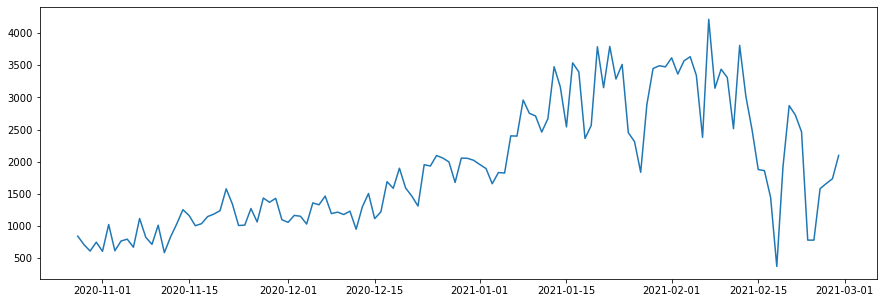

In [19]:
plt.figure(figsize = (15, 5))
plt.plot("Date", "New Cases", data = pd.concat([before_holiday, after_holiday]));

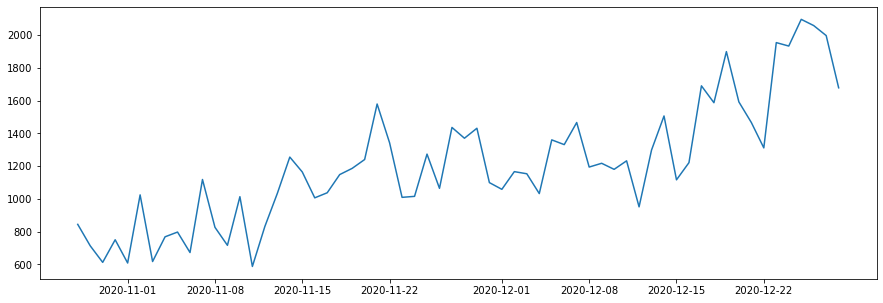

In [20]:
plt.figure(figsize = (15, 5))
plt.plot("Date", "New Cases", data = before_holiday);

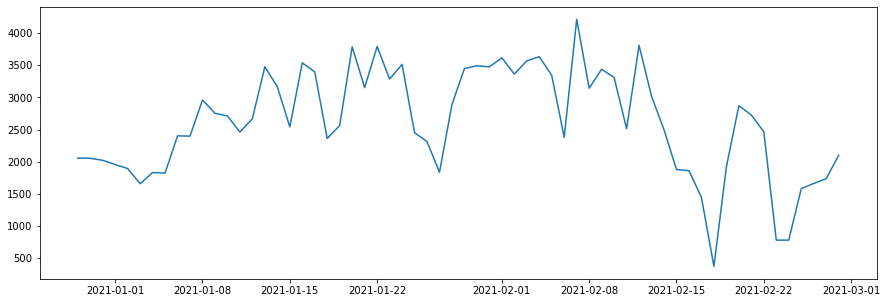

In [21]:
plt.figure(figsize = (15, 5))
plt.plot("Date", "New Cases", data = after_holiday);

## Hypotesis Testing

### Paired Tests - One tailed

- H0: μ2 ≤ μ1 $\rightarrow$ The population mean of new cases in DKI Jakarta after year-end holiday (Starts from 28th December) is not greater than before year-end holiday.
- H1: μ2 > μ1 $\rightarrow$ The population mean of new cases in DKI Jakarta after year-end holiday (Starts from 28th December) is greater than before year-end holiday.

In [22]:
t, p = stats.ttest_rel(after_holiday["New Cases"], before_holiday["New Cases"])
p1 = p/2
print(f"t-statistic: {t}")
print(f"t-statistic-pvalue: {p1}")

t-statistic: 11.22124505832743
t-statistic-pvalue: 9.042454167046478e-17


In [23]:
pop = np.random.normal(before_holiday["New Cases"].mean(), before_holiday["New Cases"].std(), 100000)

ci = stats.norm.interval(0.90, before_holiday["New Cases"].mean(), before_holiday["New Cases"].std())

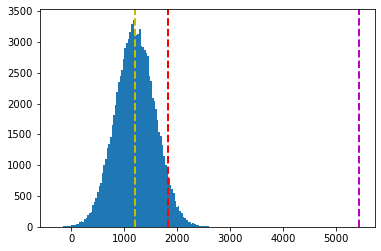

In [24]:
plt.hist(pop, bins = 100)
plt.axvline(pop.mean(), color = "y", linestyle = "--", linewidth = 2)
plt.axvline(ci[1], color = "r", linestyle = "--", linewidth = 2)
plt.axvline(pop.mean() + t*pop.std(), color = "m", linestyle = "--", linewidth = 2)
plt.show()

In [25]:
if p1 <= 0.05:
    print("Safe to reject H0, we can accept H1 because of the sufficient evidence.")
elif p1 > 0.05:
    print("Can't reject H0, we can't accept H1 because of the insufficient evidence.")

Safe to reject H0, we can accept H1 because of the sufficient evidence.


## Conclusions

Based on one tailed - paired t-test,  we can reject H0 and accept H1 because of the sufficient evidence.

**Final Conclusion:** H1 $\rightarrow$ The population mean of new cases in DKI Jakarta after year-end holiday (Starts from 28th December) is greater than before year-end holiday.

In [26]:
print("Before Holiday New Cases mean: {}".format(round(before_holiday["New Cases"].mean(), 3)))
print("After Holiday New Cases mean: {}".format(round(after_holiday["New Cases"].mean(), 3)))

Before Holiday New Cases mean: 1208.468
After Holiday New Cases mean: 2614.855


### The Trend

Checking the trend for sanity check.

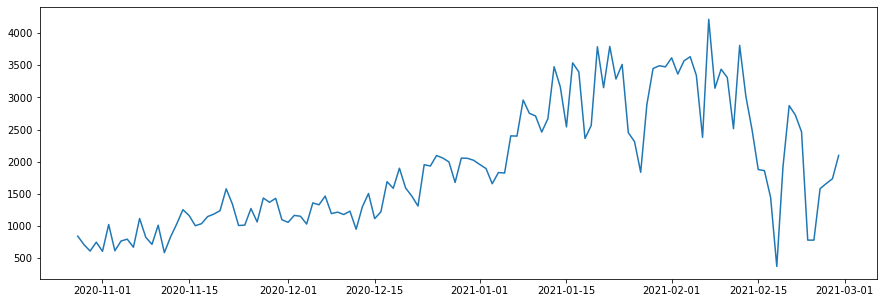

In [27]:
plt.figure(figsize = (15, 5))
plt.plot("Date", "New Cases", data = pd.concat([before_holiday, after_holiday]));